<H1>Pytegorean win percentage</H1>
<p> This notebook has the calculation of a pytegorian win percentage of the 2018 premier league season, it will be compare to the win percentage to determine if there is a relación between them. Also, there will be a implementation of linear regression using te Stocahastic Gradient Descent to optimize the loss function.
<p>The data used in this notebook was taken from <a>https://www.football-data.co.uk/books.php</a> by joseph buchdahl.The implamentation of linear regression model was made based on the information in the WebSite "Real Python" <a>https://realpython.com/gradient-descent-algorithm-python/</a>. The Pythagorean win percentage topic is explained in <a>https://www.coursera.org/learn/prediction-models-sports-data/</a></p>
<ul> Topics
  <li>Stocastic Gradient Descent</li>
  <li>Linear Regression</li>
  <li>Loss Function</li></ul>

<H2>Welcome!!!</H2>


Import Main libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

##Load the dataset
2018 English Premier League Season

In [2]:
!git clone https://github.com/Hardila-data/Premier_L.git

Cloning into 'Premier_L'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
url = 'Premier_L/Premier_League_2018.csv'
df1 = pd.read_csv(url)
df1.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


Add new column to the dataframe to count the number of games.

In [4]:
df1['cnt'] = 1

Select columns that are important to determine the win and pytagorean percentage

In [5]:
columns_matters = ['Date', 'HomeTeam','AwayTeam','FTHG'	,'FTAG'	,'FTR','cnt']

In [6]:
df_new = df1[columns_matters]
df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,cnt
0,10/08/2018,Man United,Leicester,2,1,H,1
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1
2,11/08/2018,Fulham,Crystal Palace,0,2,A,1
3,11/08/2018,Huddersfield,Chelsea,0,3,A,1
4,11/08/2018,Newcastle,Tottenham,1,2,A,1


Identify the final outcome in the games, whether a home team win, away team win or draw

In [7]:
df_new = df_new.assign(home_winvalue_2018 = np.where(df_new['FTR']=='H',1,np.where(df_new['FTR']=='D',.5,0)))
df_new = df_new.assign(away_winvalue_2018 = np.where(df_new['FTR']=='A',1,np.where(df_new['FTR']=='D',.5,0)))
df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,cnt,home_winvalue_2018,away_winvalue_2018
0,10/08/2018,Man United,Leicester,2,1,H,1,1.0,0.0
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,1.0,0.0
2,11/08/2018,Fulham,Crystal Palace,0,2,A,1,0.0,1.0
3,11/08/2018,Huddersfield,Chelsea,0,3,A,1,0.0,1.0
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,0.0,1.0


Create two new dataframes group by HomeTeam and Away Team.
<p>HomeTeam Dataframe</p>

In [8]:
df_new_home = df_new.groupby(['HomeTeam'])[['home_winvalue_2018','FTHG','FTAG','cnt']].apply(sum).reset_index()
df_new_home = df_new_home.rename(columns={'HomeTeam':'team','cnt':'game_played_home','FTHG':'goal_scored_home', 'FTAG':'goal_recieved_home'})
df_new_home.head()

,team,home_winvalue_2018,goal_scored_home,goal_recieved_home,game_played_home
0,Arsenal,15.5,42.0,16.0,19.0
1,Bournemouth,10.5,30.0,25.0,19.0
2,Brighton,8.5,19.0,28.0,19.0
3,Burnley,8.0,24.0,32.0,19.0
4,Cardiff,7.0,21.0,38.0,19.0


AwayTeam dataframe

In [9]:
df_new_away = df_new.groupby(['AwayTeam'])[['away_winvalue_2018','FTHG','FTAG','cnt']].apply(sum).reset_index()
df_new_away = df_new_away.rename(columns={'AwayTeam':'team',  'cnt':'game_played_away', 'FTHG':'goal_recieved_away', 'FTAG':'goal_scored_away'})
df_new_away.head()

,team,away_winvalue_2018,goal_recieved_away,goal_scored_away,game_played_away
0,Arsenal,9.0,35.0,31.0,19.0
1,Bournemouth,5.5,45.0,26.0,19.0
2,Brighton,5.0,32.0,16.0,19.0
3,Burnley,6.5,36.0,21.0,19.0
4,Cardiff,5.0,31.0,13.0,19.0


It is time to merge the Away dataframe and the Home dataframe to  create a new dataframe with goals for and goals against

In [10]:
english_df = pd.merge(df_new_home, df_new_away, on=['team'])
english_df.head()

,team,home_winvalue_2018,goal_scored_home,goal_recieved_home,game_played_home,away_winvalue_2018,goal_recieved_away,goal_scored_away,game_played_away
0,Arsenal,15.5,42.0,16.0,19.0,9.0,35.0,31.0,19.0
1,Bournemouth,10.5,30.0,25.0,19.0,5.5,45.0,26.0,19.0
2,Brighton,8.5,19.0,28.0,19.0,5.0,32.0,16.0,19.0
3,Burnley,8.0,24.0,32.0,19.0,6.5,36.0,21.0,19.0
4,Cardiff,7.0,21.0,38.0,19.0,5.0,31.0,13.0,19.0


Now, it will be optained Goal-for, Goal-agains and te sum of winvalue columns for any team.

In [11]:
english_df['W_2018'] = english_df['home_winvalue_2018'] + english_df['away_winvalue_2018']
english_df['GF_2018'] = english_df['goal_scored_home'] + english_df['goal_scored_away']
english_df['GA_2018'] = english_df['goal_recieved_home'] + english_df['goal_recieved_away']
english_df.head()

,team,home_winvalue_2018,goal_scored_home,goal_recieved_home,game_played_home,away_winvalue_2018,goal_recieved_away,goal_scored_away,game_played_away,W_2018,GF_2018,GA_2018
0,Arsenal,15.5,42.0,16.0,19.0,9.0,35.0,31.0,19.0,24.5,73.0,51.0
1,Bournemouth,10.5,30.0,25.0,19.0,5.5,45.0,26.0,19.0,16.0,56.0,70.0
2,Brighton,8.5,19.0,28.0,19.0,5.0,32.0,16.0,19.0,13.5,35.0,60.0
3,Burnley,8.0,24.0,32.0,19.0,6.5,36.0,21.0,19.0,14.5,45.0,68.0
4,Cardiff,7.0,21.0,38.0,19.0,5.0,31.0,13.0,19.0,12.0,34.0,69.0


Let's calculate the Win percentage, and Pythagorean win percentage.
<p>Win percentage = (Home win value + Away win value)/(total games played)</p>
<p>Pythagorean win percentage = (Goal For)**2/((Goal For)**2+ (Goal Agains)**2)</p>

In [12]:
english_df['win_percentage_2018'] = english_df['W_2018']/(english_df['game_played_home']+english_df['game_played_away'])
english_df['pyth_2018'] = english_df['GF_2018']**2/(english_df['GF_2018']**2+english_df['GA_2018']**2)
english_df

,team,home_winvalue_2018,goal_scored_home,goal_recieved_home,game_played_home,away_winvalue_2018,goal_recieved_away,goal_scored_away,game_played_away,W_2018,GF_2018,GA_2018,win_percentage_2018,pyth_2018
0,Arsenal,15.5,42.0,16.0,19.0,9.0,35.0,31.0,19.0,24.5,73.0,51.0,0.644737,0.672005
1,Bournemouth,10.5,30.0,25.0,19.0,5.5,45.0,26.0,19.0,16.0,56.0,70.0,0.421053,0.390244
2,Brighton,8.5,19.0,28.0,19.0,5.0,32.0,16.0,19.0,13.5,35.0,60.0,0.355263,0.253886
3,Burnley,8.0,24.0,32.0,19.0,6.5,36.0,21.0,19.0,14.5,45.0,68.0,0.381579,0.304557
4,Cardiff,7.0,21.0,38.0,19.0,5.0,31.0,13.0,19.0,12.0,34.0,69.0,0.315789,0.195369
5,Chelsea,15.0,39.0,12.0,19.0,10.5,27.0,24.0,19.0,25.5,63.0,39.0,0.671053,0.722951
6,Crystal Palace,7.5,19.0,23.0,19.0,10.0,30.0,32.0,19.0,17.5,51.0,53.0,0.460526,0.480776
7,Everton,12.0,30.0,21.0,19.0,7.5,25.0,24.0,19.0,19.5,54.0,46.0,0.513158,0.579491
8,Fulham,7.5,22.0,36.0,19.0,2.0,45.0,12.0,19.0,9.5,34.0,81.0,0.250000,0.149799
9,Huddersfield,3.5,10.0,31.0,19.0,3.0,45.0,12.0,19.0,6.5,22.0,76.0,0.171053,0.077316


Calculate a linear regression to determine an equation to relate win_percentage and Pythagorean win percentage. It will be implement the stocastic gradient descent to tune the weigths of the linear equation.
<p>Linear Regression Equation = X*b1 + b0 </p>

The gradient function return a result from the derivative of the loss function, it helps to tune the weigth bo and b1 to the regression function.

<p>Loss Function Ordinary Least Squares = sum(y-f(X))**2</p>

In [13]:
def sumsquare_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean() 

Iterate the gradient descent algorithm to find the optimal values.

In [14]:
def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

Determine X and y to find the regression equation.



*   X = Pythagorean win percentage
*   y = Win percentage





In [15]:
X = english_df.pyth_2018.to_numpy()
y = english_df.win_percentage_2018.to_numpy()

Evaluate the gradient descent function

In [16]:
b0,b1 = gradient_descent(x=X, y=y, gradient=sumsquare_gradient, n_iter=500 ,start=[0.1, 0.1])
print(f'The weigths of the linear function optained from optimization were b0 : {b0}, b1 : {b1}')

The weigths of the linear function optained from optimization were b0 : 0.16387784073559397, b1 : 0.691338444000287


In [17]:
result = b0 + b1*(np.arange(0.1,1,0.2))

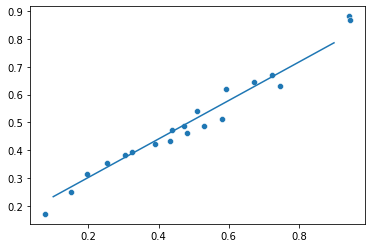

In [18]:
sns.lineplot(x=np.arange(0.1,1,0.2), y=result)
sns.scatterplot(x=X, y=y)

<p>In the above plot there is a notabled correlation between the win percentage of the team in the season and the Pythagorean win percentage calculated based on the Goal-For and Goal-Agains in the matches.</p>

<p>The quanitity of goals-for and goal-agains by any team helps us to determine how stronger is one over the other.</p>

<p>I prompt you to modify the n_iter parameter in the gradient descent function and see how the linear plot above change</p>

<H3>Thanks!!</H3>

